In [2]:
import moss
import os.path as op
import nibabel as nb
import numpy as np
import seaborn as sns
%matplotlib inline

/home/iballard/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
striatum = op.abspath('/home/iballard/fd/analysis/striatum/striatum_fl.nii.gz')
phc = op.abspath('/home/iballard/fd/roi_figure/phc.nii.gz')
prc = op.abspath('/home/iballard/fd/roi_figure/prc.nii.gz')
ifs = op.abspath('/home/iballard/fd/roi_figure/ifs.nii.gz')
hipp = op.abspath('/home/iballard/fd/roi_figure/hipp.nii.gz')
ofc = op.abspath('/home/iballard/fd/roi_figure/mOFC.nii.gz')


striatum = nb.load(striatum).get_data()
phc = nb.load(phc).get_data()
prc = nb.load(prc).get_data()
ifs = nb.load(ifs).get_data()
hipp = nb.load(hipp).get_data()
ofc = nb.load(ofc).get_data()

overlap = np.logical_and(phc > 0, prc > 0)
phc[overlap] = 0
prc[overlap] = 0

masks = striatum + phc + prc + ifs + hipp + ofc

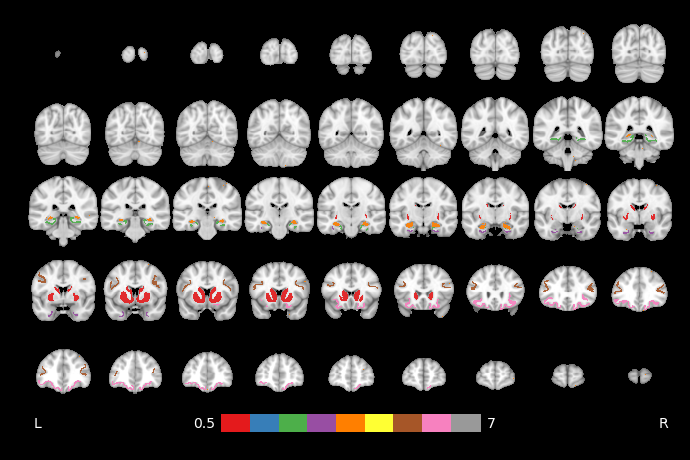

In [15]:
a = moss.mosaic.Mosaic(stat = masks, slice_dir='coronal')
a.plot_activation(thresh=.1, vmin=.5, vmax=7,
                             pos_cmap='Set1', alpha=.9)
a.savefig('/home/iballard/Dropbox/fd/figs/paper/rois.svg', 
            dpi = 300)